# Image Combination and Processing Tutorial/Boilerplate

This notebook will help you create median combined flat field images from the WIYN 0.9m

In [1]:
import astropy.io.fits as fits
import numpy as np
import glob

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [3]:
##read in a sample 0.9m image and print it's dimensions
image1 = fits.getdata("data/wiyn0_9/2016june18/NGC6240/c7558t0054o00.fits")
image1.shape

(4150, 4150)

In [4]:
##Tell the program how many flat images to combine
nims = 5    ##insert the number of flat images here before the ##
##insert the path to the file and basic string that starts out the name of all of the files, 
#in quotations. 

basestring = "/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7560t"
              ## For example, "data/wiyn0_9/2016june18/NGC6240/c7558t"


In [5]:
##this piece takes your input above and makes a
#3D "cube" of bias-subtracted images for you to work with
dim = len(image1[0])
first_frame = 1
image_bsub = np.zeros((dim,dim,nims))

for i,file_index in enumerate(range(first_frame,first_frame+nims)):
    filename = basestring+'%04i' % file_index +'o00.fits'
    print(filename)
    image = fits.getdata(filename)
    ## subtract the bias from the bias overscan regions
    overscan=image[4100:4140,4100:4140]
    overscan_mean = mean(overscan)
    image_bsub[:,:,i] = image - overscan_mean

/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7560t0001o00.fits
/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7560t0002o00.fits
/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7560t0003o00.fits
/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7560t0004o00.fits
/mnt/camp-storage/ATC2016/wiyn_09/Converted2016june20/c7560t0005o00.fits


In [6]:
##now we'll take the median combination of these images
median_image = median(image_bsub, axis=2)

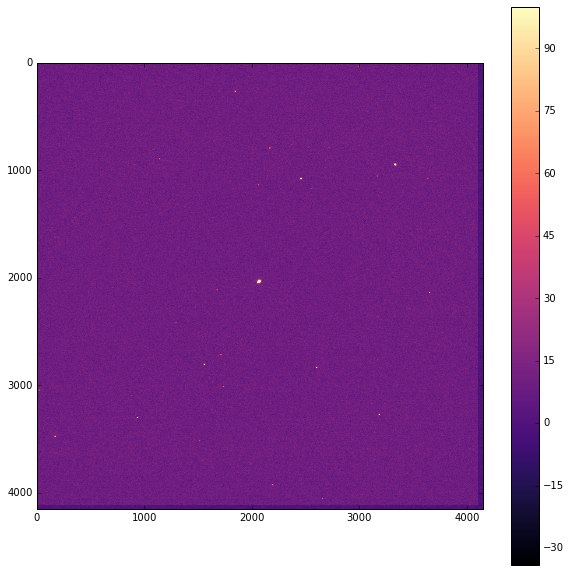

In [9]:
## plot this median image, you may need to add something to imshow to see anything
figure(figsize=(10,10))
imshow(median_image, cmap='magma',vmax=100) 
colorbar()

In [ ]:
## write out your new image as a .fits file

fname = "test.fits"  ##fill in your desired filename here, in quotes, for example "Rflat.fits"
fits.writeto(fname, median_image)